In [3]:
import spacepy.pycdf as pycdf
import numpy as np
import pandas as pd

# load the cdf file
cdf_file = pycdf.CDF('cdf_data/AL1_ASW91_L1_AUX_20250621_UNP_9999_999999_V01.cdf')

CDFError: NO_SUCH_CDF: The specified CDF does not exist.

In [2]:
cdf_file

<CDF:
DC_temp_mon: CDF_UINT2 [172787, 3]
ESA1_HV: CDF_UINT2 [172787, 5]
ESA1_HV_set: CDF_UINT2 [172787, 5]
ESA2_HV_mon: CDF_UINT2 [172787, 5]
ESA2_HV_set: CDF_UINT2 [172787, 5]
FEE_cal_chn: CDF_UINT2 [172787]
FEE_cal_mode: CDF_UINT2 [172787]
FEE_volt_mon: CDF_UINT2 [172787, 4]
Focus: CDF_UINT2 [172787, 5]
Focus_set: CDF_UINT2 [172787, 5]
HV_PCB_temp_mon: CDF_UINT2 [172787, 5]
HV_pack_mon: CDF_UINT2 [172787, 2]
HW_LLD: CDF_UINT2 [172787, 5]
MCP1_HV: CDF_UINT2 [172787, 5]
MCP1_HV_set: CDF_UINT2 [172787]
MCP1_PHD_mode: CDF_UINT2 [172787]
MCP1_curr_mon: CDF_UINT2 [172787, 5]
MCP1_curr_override: CDF_UINT2 [172787]
MCP1_curr_trip: CDF_UINT2 [172787]
MCP1_spike_override: CDF_UINT2 [172787]
MCP1_spike_trip: CDF_UINT2 [172787]
MCP1_start_comm: CDF_UINT2 [172787]
MCP1_status: CDF_UINT2 [172787]
MCP1_trip_check: CDF_UINT2 [172787]
MCP2_HV_mon: CDF_UINT2 [172787, 5]
MCP2_HV_set: CDF_UINT2 [172787]
MCP2_PHD_mode: CDF_UINT2 [172787]
MCP2_curr_mon: CDF_UINT2 [172787, 5]
MCP2_curr_override: CDF_UINT2 

### 📦 Available Variables in `cdf_file`

#### Instrument Health & Housekeeping
- **DC_temp_mon**: DC power supply temperature
- **HV_PCB_temp_mon**: High-voltage PCB temperature
- **fpga_temp_mon**: FPGA temperature
- **FEE_volt_mon**: Front-end electronics voltage
- **fpga_core_volt_mon**, **fpga_io_volt_mon**: FPGA core and IO voltages

#### High Voltage Control
- **ESA1_HV**, **ESA2_HV_mon**, **MCP1_HV**, **MCP2_HV_mon**: High voltage readings
- **ESA1_HV_set**, **ESA2_HV_set**, **MCP1_HV_set**, **MCP2_HV_set**: HV setpoints
- **MCP*_curr_mon**, **MCP*_curr_trip**, **MCP*_spike_trip**: MCP current monitoring and trip thresholds

#### Detector Configuration & Modes
- **FEE_cal_mode**, **MCP1_PHD_mode**, **MCP2_PHD_mode**: Calibration and pulse height modes
- **THA1_single_energy_mode**, **THA2_single_energy_mode**: Energy mode for THA1/THA2
- **auto_ctrl_mode**, **man_ctrl_mode**, **comm_mode**: Control and communication modes
- **cal_hist_mode**, **step_num**: Calibration and step configuration

#### Science Data
- **angle_tha1**: Angular look directions (shape: [time, bins, components])
- **angle_tha2**: Angular look directions (shape: [time, bins, components])
- **angle_xgse**, **angle_ygse**, **angle_zgse**: Spacecraft orientation (GSE coordinates)
- **trig_counts**, **coin_trig_counts**, **rej_counts**, **peak_det_counts**: Detector count rates (various shapes)
- **obs_time**, **epoch_for_cdf**: Observation timestamps
- **spacecraft_xpos**, **spacecraft_ypos**, **spacecraft_zpos**: Spacecraft position
- **spacecraft_xvel**, **spacecraft_yvel**, **spacecraft_zvel**: Spacecraft velocity

#### Miscellaneous
- **frame_num**: Frame or packet number
- **fpga_ticks**: Internal FPGA clock ticks
- **pile_up_time**: Pile-up rejection window
- **SW_LLD**, **SW_ULD**, **HW_LLD**: Software/hardware level discriminators

---

**Note:**  
- Count variables (e.g., `trig_counts`, `coin_trig_counts`) are likely binned by time, energy, and/or angle.
- No explicit flux variable is present, but flux can be estimated from counts, energy bins, angles, and time intervals.
- For flux calculation, you’ll need bin widths (energy, angle), time resolution, and detector area (from documentation).


In [ ]:
data_pd = pd.DataFrame({
    'Time': cdf_file['epoch_for_cdf'][:, 0],
    # epoch_for_cdf is the time in CDF epoch format (taking first column)
    'obs_time': cdf_file['obs_time'][:, 0],
    # obs_time is the observation time in seconds since the epoch (first column)
    'DC_temp': cdf_file['DC_temp_mon'][:, 0],
    # DC_temp_mon is the temperature of the DC power supply (first column)
    'energy_mode_01': cdf_file['THA1_single_energy_mode'][:],
    # THA1_single_energy_mode is the energy mode of the THA1 instrument
    'energy_mode_02': cdf_file['THA2_single_energy_mode'][:],
    # THA2_single_energy_mode is the energy mode of the THA2 instrument
    'x_pos': cdf_file['spacecraft_xpos'][:],
    'y_pos': cdf_file['spacecraft_ypos'][:],
    'z_pos': cdf_file['spacecraft_zpos'][:],
})


In [8]:
Counts = np.sum(cdf_file['coinc_trig_count_total'][:],axis=1)

In [11]:
from spacepy import pycdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cdf = pycdf.CDF('c:/Users/harsh/Downloads/SWIS Dataset/AL1_ASW91_L1_AUX_20241020_UNP_9999_999999_V01.cdf')

# Extract time (you might need to flatten depending on shape)
epoch = cdf['epoch_for_cdf'][:, 0]  # Take first sub-index if it's 2D
time = pd.to_datetime(epoch)

# Extract counts as flux proxy
counts = np.sum(cdf['coinc_trig_count_total'][:], axis=1)  # Sum over channels


In [12]:
df = pd.DataFrame({
    'Time': time,
    'Counts': counts
})

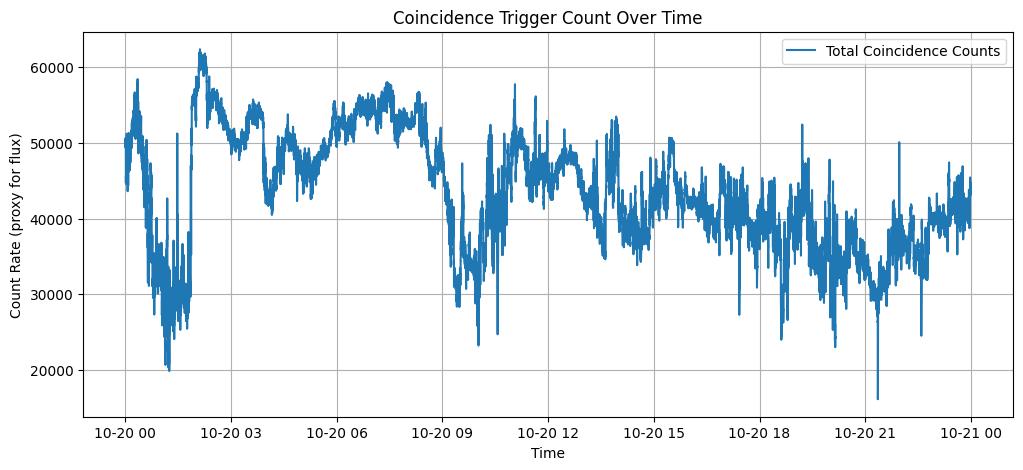

In [13]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['Counts'], label='Total Coincidence Counts')
plt.xlabel('Time')
plt.ylabel('Count Rate (proxy for flux)')
plt.title('Coincidence Trigger Count Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [24]:
# Try a range of threshold multipliers to find the first spike
best_multiplier = None
best_onset = None

for mult in np.arange(1.0, 3.1, 0.1):
    threshold = np.mean(df['Counts']) + mult * np.std(df['Counts'])
    spike_rows = df[df['Counts'] > threshold]
    if not spike_rows.empty:
        best_multiplier = mult
        best_onset = spike_rows.iloc[0]
        print(f"Multiplier: {mult:.2f} | Threshold: {threshold:.2f} | First spike at: {best_onset['Time']}")
        break

if best_onset is None:
    print("No spike detected for multipliers in range 1.0–3.0")


Multiplier: 1.00 | Threshold: 50996.08 | First spike at: 2024-10-20 00:02:12.819000


In [27]:
# Calculate threshold
threshold = 50996.08

# Filter rows where Counts > threshold
spike_rows = df[df['Counts'] > threshold]

# Check if any spikes found
if not spike_rows.empty:
    onset = spike_rows.iloc[0]
    arrival_time = onset['Time']
    print("Estimated CME particle arrival:", arrival_time)
else:
    print("⚠️ No significant flux spike detected using this threshold.")
    print(f"Try adjusting the threshold or inspect the plot manually.")


Estimated CME particle arrival: 2024-10-20 00:02:12.819000


In [28]:
onset = df.loc[df['Counts'].idxmax()]
arrival_time = onset['Time']
print("Fallback CME arrival time (max counts):", arrival_time)


Fallback CME arrival time (max counts): 2024-10-20 02:06:57.883000


In [29]:
from datetime import datetime

# Example CME launch time (from CACTus or LASCO)
cme_launch_time = datetime.strptime("2024-03-04 00:00:00", "%Y-%m-%d %H:%M:%S")

# Compute speed
travel_time_sec = (arrival_time - cme_launch_time).total_seconds()
distance_km = 1.5e6  # L1 distance

if travel_time_sec > 0:
    cme_speed = distance_km / travel_time_sec
    print(f"CME Speed: {cme_speed:.2f} km/s (Travel time: {travel_time_sec/3600:.2f} hrs)")
else:
    print("Error: Arrival time before CME launch.")


CME Speed: 0.08 km/s (Travel time: 5522.12 hrs)


In [30]:
df['Counts_diff'] = df['Counts'].diff()

# Use rolling max to spot sharpest change
window_size = 20
df['Rolling_diff'] = df['Counts_diff'].rolling(window=window_size).mean()

# Get index of max change
peak_index = df['Rolling_diff'].idxmax()
arrival_time = df.loc[peak_index, 'Time']

print("📍 Sharpest rise in counts detected at:", arrival_time)


📍 Sharpest rise in counts detected at: 2024-10-20 23:42:28.570000


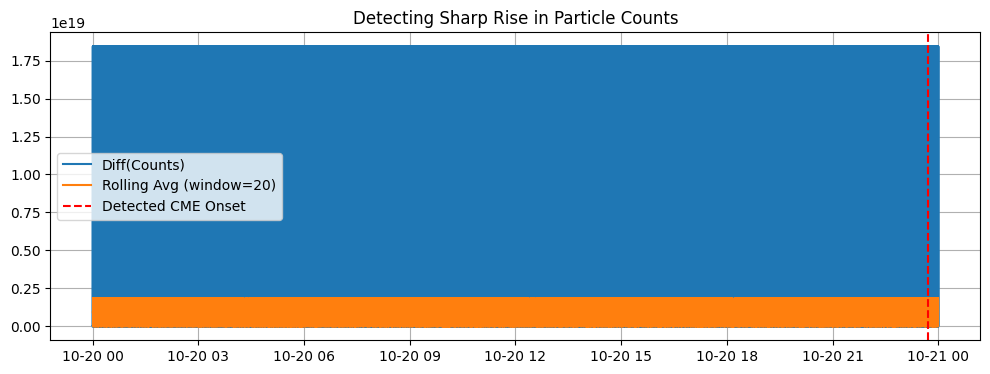

In [61]:
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['Counts_diff'], label='Diff(Counts)')
plt.plot(df['Time'], df['Rolling_diff'], label=f'Rolling Avg (window={window_size})')
plt.axvline(arrival_time, color='red', linestyle='--', label='Detected CME Onset')
plt.legend()
plt.grid(True)
plt.title("Detecting Sharp Rise in Particle Counts")
plt.show()


In [32]:
from datetime import datetime

cme_launch_time = datetime.strptime("2024-10-19 00:00:00", "%Y-%m-%d %H:%M:%S")


In [33]:
travel_time_sec = (arrival_time - cme_launch_time).total_seconds()
distance_km = 1.5e6  # L1 distance

if travel_time_sec > 0:
    cme_speed = distance_km / travel_time_sec
    print(f"✅ CME Speed: {cme_speed:.2f} km/s (Travel time: {travel_time_sec/3600:.2f} hrs)")
else:
    print("⚠️ Error: Arrival time is before launch time.")


✅ CME Speed: 8.73 km/s (Travel time: 47.71 hrs)


In [34]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt

# Assume df contains 'Time' and 'Counts' columns already
df['Counts_diff'] = df['Counts'].diff()
df['Rolling_diff'] = df['Counts_diff'].rolling(window=20).mean()

# Threshold for detecting spikes (tune this!)
diff_threshold = df['Rolling_diff'].mean() + 2 * df['Rolling_diff'].std()

# Identify all spikes above threshold
spikes = df[df['Rolling_diff'] > diff_threshold].copy()

# Group nearby spikes together (e.g., within 4 hours) as one CME
spikes['Group'] = (spikes['Time'].diff() > pd.Timedelta(hours=4)).cumsum()

# Store results
results = []

for group_id, group_data in spikes.groupby('Group'):
    arrival_time = group_data['Time'].iloc[0]
    
    # Try different launch time assumptions (1 to 3 days before)
    best_speed = None
    best_launch = None
    
    for delta_days in [1, 1.5, 2, 2.5, 3]:
        launch_time = arrival_time - timedelta(days=delta_days)
        travel_time = (arrival_time - launch_time).total_seconds()
        distance_km = 1.5e6  # Sun to L1

        speed = distance_km / travel_time  # km/s

        # Filter based on realistic CME speeds
        if 300 <= speed <= 2500:
            best_speed = speed
            best_launch = launch_time
            break  # stop at first valid match

    # Save if valid
    if best_speed:
        results.append({
            'Arrival Time': arrival_time,
            'Launch Time': best_launch,
            'Travel Time (hr)': travel_time / 3600,
            'CME Speed (km/s)': best_speed
        })

# Convert to DataFrame
cme_df = pd.DataFrame(results)
print(cme_df)


Empty DataFrame
Columns: []
Index: []


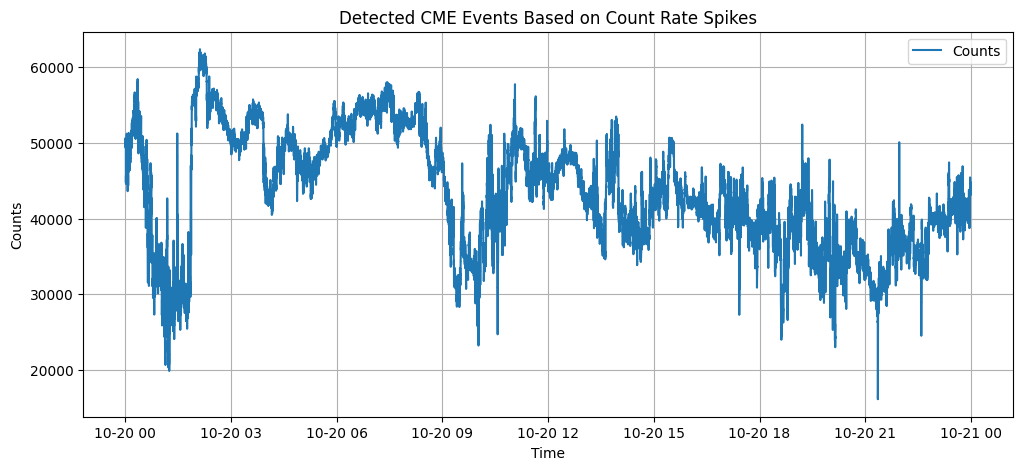

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['Counts'], label='Counts')

for _, row in cme_df.iterrows():
    plt.axvline(row['Arrival Time'], color='red', linestyle='--')

plt.legend()
plt.title("Detected CME Events Based on Count Rate Spikes")
plt.xlabel("Time")
plt.ylabel("Counts")
plt.grid(True)
plt.show()


In [36]:
print("Mean Rolling_diff:", df['Rolling_diff'].mean())
print("Std Rolling_diff:", df['Rolling_diff'].std())
print("Threshold used:", diff_threshold)

# Quick stats
print("Max Rolling_diff:", df['Rolling_diff'].max())


Mean Rolling_diff: 9.102345542168113e+17
Std Rolling_diff: 5.929520663128945e+17
Threshold used: 2.0961386868426002e+18
Max Rolling_diff: 1.8446744073709793e+18


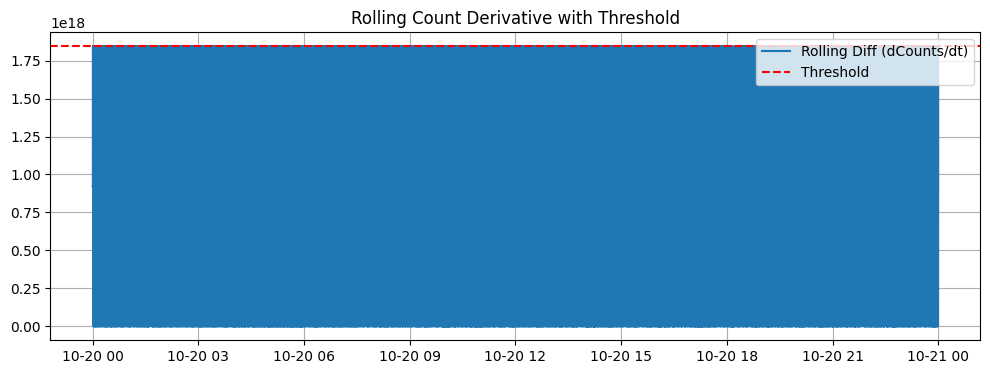

In [59]:
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['Rolling_diff'], label='Rolling Diff (dCounts/dt)')
plt.axhline(diff_threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title("Rolling Count Derivative with Threshold")
plt.grid(True)
plt.show()


In [58]:
diff_threshold = df['Rolling_diff'].mean() + 1.58 * df['Rolling_diff'].std()
diff_threshold


np.float64(1.8470988189911844e+18)